In [14]:

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [15]:

url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/phan%20thiet?key=TQ39TAZE5EZHHYRGNANAQ5JJB'
response = requests.get(url).json()



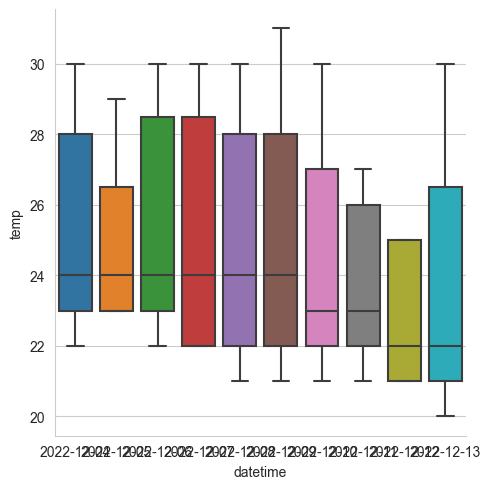

In [16]:
datetime = []
temp = []
dist ={}
for i in range(10):
    for j in range(23):
        datetime.append(str(response["days"][i]["datetime"]))
        temp.append(round(float((response["days"][i]["hours"][j]["temp"]-32)/1.8)))        
dist['datetime'] = datetime
dist['temp'] = temp
df = pd.DataFrame(dist)
sns.set_style("whitegrid")
sns.catplot(x='datetime', y='temp', kind='box', data=df)   

<AxesSubplot: title={'center': 'temp'}, xlabel='datetime'>

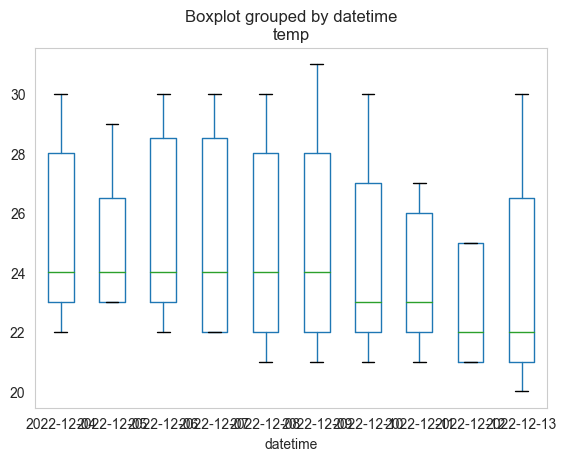

In [17]:
datetime = []
temp = []
dist ={}
for i in range(10):
    for j in range(23):
        datetime.append(str(response["days"][i]["datetime"]))
        temp.append(round(float((response["days"][i]["hours"][j]["temp"]-32)/1.8)))        
dist['datetime'] = datetime
dist['temp'] = temp

df= pd.DataFrame(dist)
df.boxplot(by ='datetime', column =['temp'], grid = False)
# sns.set_style("whitegrid")
# sns.catplot(x='datetime', y='temp', kind='box', data=df)    

Text(0, 0.5, 'Temp')

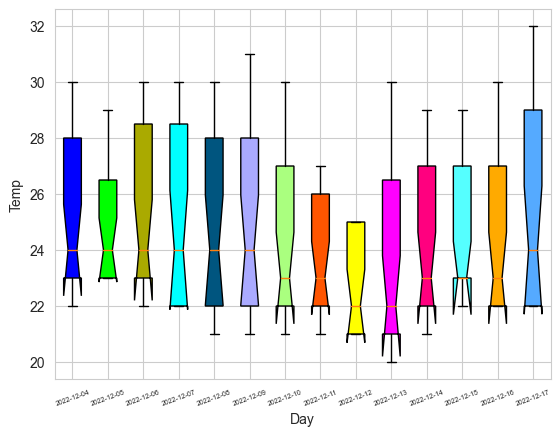

In [18]:
dist={}
colum = []
labels = []
temp = []
for i in range(14):
    for j in range(23):
        temp.append(round(float((response["days"][i]["hours"][j]["temp"]-32)/1.8)))        
    dist[str(response["days"][i]["datetime"])] = temp
    temp = []

df= pd.DataFrame(dist)
for i in df.columns:
    labels.append(i)
    colum.append(df[i])
k =[]
for i in range(1,len(labels)+1):
    k.append(i)
fig, ax = plt.subplots()
box= ax.boxplot(colum, notch=True, patch_artist=True)
colors = ['#0000FF', '#00FF00','#aaaa00','#00ffff','#00557f','#aaaaff','#aaff7f',
            '#ff5500','#FFFF00', '#FF00FF','#ff007f','#55ffff','#ffaa00','#55aaff']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xticks(k,labels,fontsize = 5, rotation = 20)
plt.xlabel("Day")
plt.ylabel("Temp")


<AxesSubplot: >

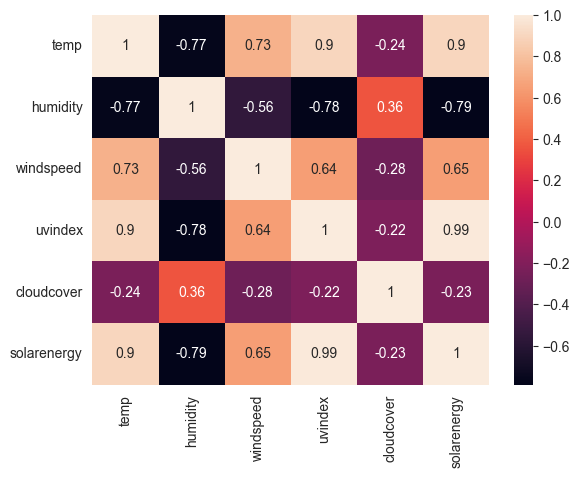

In [19]:

import time


datetime = []
temp = []
humidity = []
windspeed = []
uvindex = []
datetime = []
cloudcover=[]
solarenergy = []
feelslike = []
dist ={}
for j in range(15):
    for i in range(7,18):
        datetime.append(str(response["days"][j]["datetime"]))
        temp.append(round(float((response["days"][j]["hours"][i]["temp"]-32)/1.8)))
        humidity.append(float(response["days"][j]["hours"][i]['humidity']))
        windspeed.append(float(response["days"][j]["hours"][i]['windspeed']))
        uvindex.append(float(response["days"][j]["hours"][i]['uvindex']))
        cloudcover.append(float(response["days"][j]["hours"][i]['cloudcover']))
        solarenergy.append(float(response["days"][j]["hours"][i]['solarenergy']))
        feelslike.append(float(response["days"][j]["hours"][i]['solarenergy']))
             

dist['temp'] = temp
dist["humidity"] = humidity
dist["windspeed"] = windspeed
dist["uvindex"] = uvindex
dist["cloudcover"] = cloudcover
dist["solarenergy"] = solarenergy
df = pd.DataFrame(dist,index =datetime)

sns.heatmap(df.corr(),annot=True)







In [20]:
df= round(df.corr(),2)
data = []
for row in df.columns:
    data.append(list(df[row]))
data= np.array(data)
data

array([[ 1.  , -0.77,  0.73,  0.9 , -0.24,  0.9 ],
       [-0.77,  1.  , -0.56, -0.78,  0.36, -0.79],
       [ 0.73, -0.56,  1.  ,  0.64, -0.28,  0.65],
       [ 0.9 , -0.78,  0.64,  1.  , -0.22,  0.99],
       [-0.24,  0.36, -0.28, -0.22,  1.  , -0.23],
       [ 0.9 , -0.79,  0.65,  0.99, -0.23,  1.  ]])

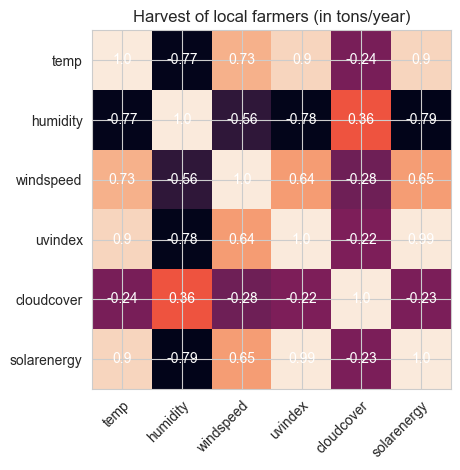

In [21]:
label1 = ['temp','humidity',"windspeed","uvindex","cloudcover","solarenergy"]

data = np.array(data)
fig, ax = plt.subplots()
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(label1)), labels=label1)
ax.set_yticks(np.arange(len(label1)), labels=label1)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(label1)):
    for j in range(len(label1)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


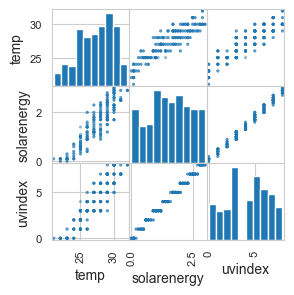

In [22]:
for j in range(15):
    for i in range(7,17):
        temp.append(round(float((response["days"][j]["hours"][i]["temp"]-32)/1.8)))
        uvindex.append(float(response["days"][j]["hours"][i]['uvindex']))
        solarenergy.append(float(response["days"][j]["hours"][i]['solarenergy']))
dist1 ={}
dist1['temp'] = temp
dist1["solarenergy"] = solarenergy
dist1["uvindex"] = uvindex
data = pd.DataFrame(dist1)
g = pd.plotting.scatter_matrix(data, figsize=(3,3), marker = 'o', hist_kwds = {'bins': 10}, s = 5, alpha = 0.5)
# plt.xticks(fontsize = 5)
# plt.yticks(fontsize = 5)
plt.show()
# sns.pairplot(data)

In [23]:
text = '07:17'
int(text[:2])

7

In [24]:
datetime = []
temp = []
humidity = []
windspeed = []
uvindex = []
i=3
text_time = '19:31'
datetime.append(str(response["days"][0]["hours"][int(text_time[:2])+i]["datetime"]))
temp.append(round(float((response["days"][0]["hours"][int(text_time[:2])+i]["temp"]-32)/1.8)))
humidity.append(float(response["days"][0]["hours"][int(text_time[:2])+i]['humidity']))
windspeed.append(float(response["days"][0]["hours"][int(text_time[:2])+i]['windspeed']))
uvindex.append(float(response["days"][0]["hours"][int(text_time[:2])+i]['uvindex']))   


print(datetime)
print(temp)
print(humidity)

['22:00:00']
[23]
[90.18]


In [25]:
windspeed.append(float(response["days"][1]['windspeed']))
print(windspeed)

[2.9, 6.7]


In [ ]:
plt.clf()
fig.suptitle('Scatter Plot: Weather forecast for next few hours',size=9)
plt.scatter(datetime, humidity, s=50, c='blue', label='Humidity (%)')
plt.scatter(datetime, temp, s=50, c='red', label='Temp (℃)')
plt.scatter(datetime, windspeed, s=50, c='green', label='Wind speed (m/s)')
plt.scatter(datetime,uvindex, s=50,c='y', label="UV index")
plt.xticks(fontsize = 5, rotation = 20)
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Index")  

In [ ]:
plt.clf()
fig.suptitle('Bar Plot: Weather forecast for next few hours',size=9)
plt.bar(datetime,humidity,width=-0.4,align='edge',color='b',label='Humidity (%)')
plt.bar(datetime,temp,width=0.4,align='edge',color='r',label='Temp (℃)')
plt.bar(datetime,windspeed,width=0.4,align='edge',color='g',label='Wind speed (m/s)')
plt.bar(datetime,uvindex,width=0.4,align='edge',color='y', label="UV index")
plt.legend(loc='best')
plt.xticks(fontsize = 5, rotation = 20)
plt.xlabel("Time")
plt.ylabel("Index") 

In [ ]:
temp1 = pd.Series(temp)
temp1.plot.hist(align='mid',bins=50)
avarange=np.median(np.array(temp1))
plt.grid(True)
plt.axvline(avarange,color='red',label="Avarange temperature")
plt.xlabel('Temperature')
plt.ylabel('Index')
plt.xticks(fontsize = 6)
fig.suptitle("Histogram: Temperature for next few hours",size=9)
plt.legend(loc='best')